In [5]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [21]:
#import needed libaries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [41]:
#load the data into the notebook
Distribution_Data = pd.read_csv('C:\\Users\\USER\\OneDrive\\Documents\\ev_distribution_dataset.csv')
Geospatial_Data = pd.read_csv('C:\\Users\\USER\\OneDrive\\Documents\\geospatial_dataset.csv')
Weather_Data = pd.read_csv('C:\\Users\\USER\\OneDrive\\Documents\\weather_dataset.csv')

In [40]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,1/10/2020 18:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,1/22/2020 17:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,1/10/2020 18:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,1/22/2020 17:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,1/10/2020 18:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [42]:
Weather_Data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,1/3/2020 11:00,28.865989,0.313611,Snowy,Substation_744
1,1/3/2020 17:00,28.902260,0.817728,Clear,Substation_516
2,1/4/2020 4:00,24.212651,4.516506,Clear,Substation_261
3,1/4/2020 23:00,29.024606,3.821278,Snowy,Substation_560
4,1/5/2020 0:00,24.126655,4.965771,Snowy,Substation_258


In [43]:
Geospatial_Data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


Text(0, 0.5, 'Frequency')

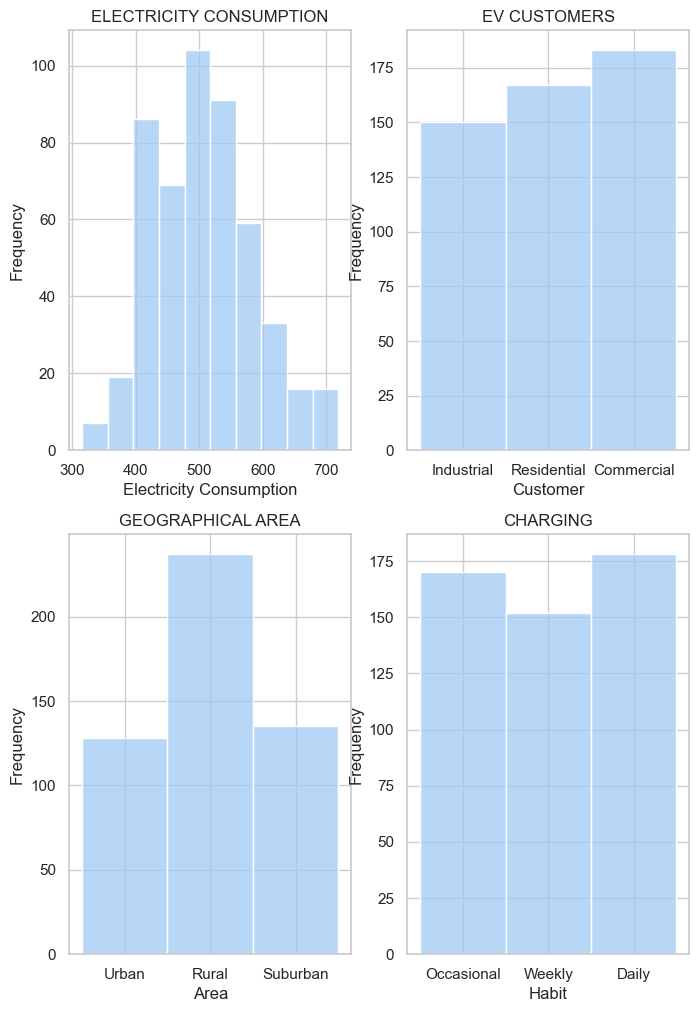

In [119]:
#Exploratory Data Analysis
#univariate Analysis #set the style and color palette
sns.set_style(style= "whitegrid")
sns.set_palette(palette= "pastel")

#create a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(8, 12))

#plot distribution of electricity consumption
sns.histplot(data= Distribution_Data, x= 'Electricity_Consumption (kWh)', bins=10, ax= axes[0, 0])
axes[0, 0]. set_title("ELECTRICITY CONSUMPTION")
axes[0, 0]. set_xlabel("Electricity Consumption")
axes[0, 0]. set_ylabel("Frequency")

#plot customer type
sns.histplot(data= Distribution_Data, x= 'Customer_Type', bins=10, ax= axes[0,1])
axes[0, 1]. set_title("EV CUSTOMERS")
axes[0, 1]. set_xlabel("Customer")
axes[0, 1]. set_ylabel("Frequency")

#plot geographical area of customers
sns.histplot(data= Distribution_Data, x= 'Geographical_Area', bins=10, ax= axes[1, 0])
axes[1, 0]. set_title("GEOGRAPHICAL AREA")
axes[1, 0]. set_xlabel("Area")
axes[1, 0]. set_ylabel("Frequency")

#plot charging habit
sns.histplot(data= Distribution_Data, x= 'Charging_Habit', bins=10, ax= axes[1, 1])
axes[1, 1]. set_title("CHARGING")
axes[1, 1]. set_xlabel("Habit")
axes[1, 1]. set_ylabel("Frequency")

In [121]:
#extract lat and long for ev charging station
Distribution_Data['ev_latitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(lambda x: float(x.split(",")[0]. replace("(", "").strip()))
Distribution_Data['ev_longitude'] = Distribution_Data ['EV_Charging_Station_Location'].apply(lambda x: float(x.split(",")[1]. replace(")", "").strip()))

#extract lat and long for substation location
Geospatial_Data['substation_latitude'] = Geospatial_Data ['Substation_Location'].apply(lambda x: float(x.split(",")[0]. replace("(", "").strip()))
Geospatial_Data['substation_longitude'] = Geospatial_Data ['Substation_Location'].apply(lambda x: float(x.split(",")[1]. replace(")", "").strip()))

#drop original location columns to clean up the datafram
Distribution_Data = Distribution_Data.drop(columns = ['EV_Charging_Station_Location'])
Geospatial_Data = Geospatial_Data.drop(columns = ['Substation_Location'])

In [122]:
Distribution_Data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,1/10/2020 18:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,1/22/2020 17:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,1/10/2020 18:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,1/22/2020 17:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,1/10/2020 18:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [123]:
Geospatial_Data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


In [ ]:
#convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_Data, geometry=gpd.points_from_xy(Distribution_Data.ev_latitude, Distribution_Data.ev_longitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_Data, geometry=gpd.points_from_xy(Geospatial_Data.substation_latitude, Geospatial_Data.substation_longitude))

#load the world map data
world= 